# Analysis of the data structures
Anirudh Lath, u1149016

## Imports

In [56]:
import pandas as pd
from sklearn.linear_model import LinearRegression

## Gaussian Data

In [57]:
df = pd.read_csv("gaussian.csv")

In [58]:
# N = 10000 dim = 2 k = 64
k_df = df[(df["N"] == 10000) & (df["dim"] == 2)]
N_df = df[(df["k"] == 64) & (df["dim"] == 2)]
dim_df = df[(df["N"] == 10000) & (df["k"] == 64)]

### Plot Graphs

### Varying K

struct
bucketKNN    AxesSubplot(0.125,0.125;0.775x0.755)
dumbKNN      AxesSubplot(0.125,0.125;0.775x0.755)
kdTree       AxesSubplot(0.125,0.125;0.775x0.755)
quadTree     AxesSubplot(0.125,0.125;0.775x0.755)
Name: time, dtype: object

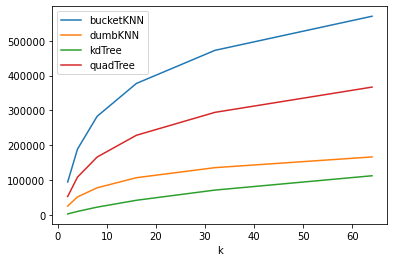

In [59]:
k_df.set_index("k").groupby("struct")["time"].plot(legend=True)

Looks like KDtree is performing better than all the other structures when k varies. Second fastest is dumbKNN, then quadtree and lastly bucketKNN.

### Varying N

struct
bucketKNN    AxesSubplot(0.125,0.125;0.775x0.755)
dumbKNN      AxesSubplot(0.125,0.125;0.775x0.755)
kdTree       AxesSubplot(0.125,0.125;0.775x0.755)
quadTree     AxesSubplot(0.125,0.125;0.775x0.755)
Name: time, dtype: object

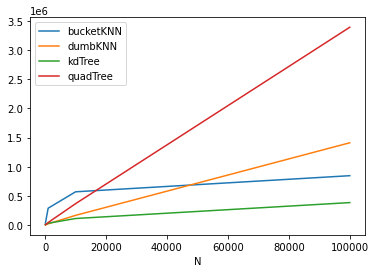

In [60]:
N_df.set_index("N").groupby("struct")["time"].plot(legend=True)

Looks like KDtree is the exceptionally faster than the other data structures when N varies. Quad tree seems to be the slowest one in this analysis.

### Varying D

struct
bucketKNN    AxesSubplot(0.125,0.125;0.775x0.755)
dumbKNN      AxesSubplot(0.125,0.125;0.775x0.755)
kdTree       AxesSubplot(0.125,0.125;0.775x0.755)
quadTree     AxesSubplot(0.125,0.125;0.775x0.755)
Name: time, dtype: object

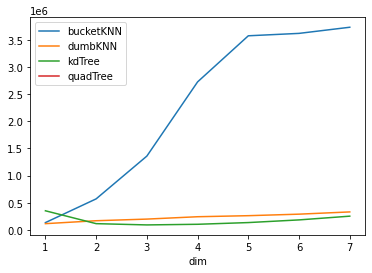

In [61]:
dim_df.set_index("dim").groupby("struct")["time"].plot(legend=True)

Looks like dumbKNN and bucketKNN start off the fastest, but then right at 2 dimensions, the kdTree supersedes them in performance. As the dim sizes increase, kdTree seems to be the fastest one but at the end, it looks like it might intersect dumbKNN and may be slower than dumbKNN.

## Uniform Data

In [62]:
df = pd.read_csv("uniform.csv")

# N = 10000 dim = 2 k = 64
k_df = df[(df["N"] == 10000) & (df["dim"] == 2)]
N_df = df[(df["k"] == 64) & (df["dim"] == 2)]
dim_df = df[(df["N"] == 10000) & (df["k"] == 64)]

### Plot Graphs

### Varying K

struct
bucketKNN    AxesSubplot(0.125,0.125;0.775x0.755)
dumbKNN      AxesSubplot(0.125,0.125;0.775x0.755)
kdTree       AxesSubplot(0.125,0.125;0.775x0.755)
quadTree     AxesSubplot(0.125,0.125;0.775x0.755)
Name: time, dtype: object

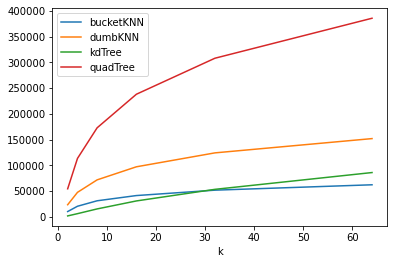

In [63]:
k_df.set_index("k").groupby("struct")["time"].plot(legend=True)

In the uniform data case, quad tree performs the poorest. The majority of these data structures appear to need time, which increases logarithmically with K. We can see that finding neighbors close to the query point takes longer for all data structures.

### Varying N

struct
bucketKNN    AxesSubplot(0.125,0.125;0.775x0.755)
dumbKNN      AxesSubplot(0.125,0.125;0.775x0.755)
kdTree       AxesSubplot(0.125,0.125;0.775x0.755)
quadTree     AxesSubplot(0.125,0.125;0.775x0.755)
Name: time, dtype: object

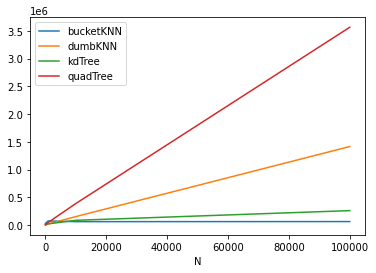

In [64]:
N_df.set_index("N").groupby("struct")["time"].plot(legend=True)

In the uniform data case, quad tree performs the poorest. Most of these data structures appear to need a time investment that increases linearly with N. We can see that finding neighbors close to the query point takes longer for all data structures.

### Varying D

struct
bucketKNN    AxesSubplot(0.125,0.125;0.775x0.755)
dumbKNN      AxesSubplot(0.125,0.125;0.775x0.755)
kdTree       AxesSubplot(0.125,0.125;0.775x0.755)
quadTree     AxesSubplot(0.125,0.125;0.775x0.755)
Name: time, dtype: object

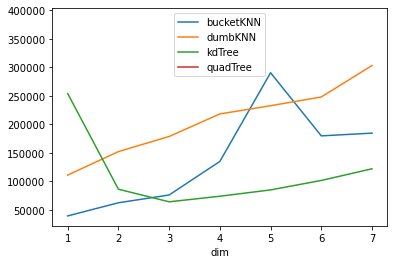

In [65]:
dim_df.set_index("dim").groupby("struct")["time"].plot(legend=True)

In the uniform data case, We can see that, with the exception of KD Tree, all data structures take longer to identify neighbors close to the query location.

## Regression

In [66]:
x = df.drop(["struct", "time"], axis=1)
y = df.time
model = LinearRegression().fit(x,y)
print(model.coef_, model.score(x,y))

[4.08504225e+03 5.54802440e+00 8.93722494e+03] 0.3123930997964721


It is clear that D has the biggest coefficient and that a change of one point in D is the best predictor of changes in run time. The execution time increases by roughly 404056 microseconds for each extra dimension point. Execution time increases by 21121 microseconds for every k-point increase. Execution time increases by 33 microseconds for every unit increase in N.

In other words, the running time will grow logarithmically as k rises. During our recursion through the tree, we went to the nodes where the neighbors we required were located. As a result, there won't be much of a cost associated with checking more nodes.

Additionally, it is intuitive that KD trees work better with more dimensions since we can divide the data more effectively between them.

I don't perceive anything weird because I believe everything operates as intended.